In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


In [2]:
ca_counties_cases_csv = "covid19cases_test.csv"


# Import us counties 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)



,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/28/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,89.0,0.0,9326.0
309,6/23/2020,Alameda,County,1685886.0,150.0,3.0,4758.0,183.0,215.0,0.0,3957.0
308,6/24/2020,Alameda,County,1685886.0,181.0,1.0,4832.0,270.0,83.0,2.0,3386.0
307,6/25/2020,Alameda,County,1685886.0,163.0,1.0,4661.0,202.0,156.0,7.0,3150.0
306,6/26/2020,Alameda,County,1685886.0,191.0,2.0,4979.0,233.0,104.0,2.0,3528.0
...,...,...,...,...,...,...,...,...,...,...,...
27324,12/5/2020,Yuba,County,79290.0,42.0,0.0,193.0,38.0,50.0,0.0,301.0
27323,12/6/2020,Yuba,County,79290.0,37.0,0.0,196.0,45.0,65.0,0.0,306.0
27322,12/7/2020,Yuba,County,79290.0,44.0,0.0,475.0,58.0,88.0,0.0,314.0
27348,11/11/2020,Yuba,County,79290.0,23.0,0.0,199.0,15.0,8.0,0.0,127.0


In [3]:
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [4]:
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== "Los Angeles"]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
8838,9/9/2020,Los Angeles,County,10257557.0,932.0,28.0,42117.0,1534.0,659.0,57.0,13500.0
8839,9/8/2020,Los Angeles,County,10257557.0,1050.0,31.0,46402.0,1767.0,413.0,4.0,32324.0
8840,9/7/2020,Los Angeles,County,10257557.0,629.0,29.0,10077.0,477.0,488.0,26.0,42790.0
8841,9/6/2020,Los Angeles,County,10257557.0,533.0,23.0,9299.0,498.0,744.0,3.0,41226.0
8842,9/5/2020,Los Angeles,County,10257557.0,573.0,23.0,12005.0,600.0,1176.0,24.0,47112.0
...,...,...,...,...,...,...,...,...,...,...,...
8712,1/13/2021,Los Angeles,County,10257557.0,11610.0,255.0,121432.0,16325.0,11690.0,263.0,141644.0
8713,1/12/2021,Los Angeles,County,10257557.0,13121.0,282.0,123218.0,17150.0,11861.0,306.0,167718.0
8714,1/11/2021,Los Angeles,County,10257557.0,14517.0,293.0,147165.0,19423.0,12651.0,134.0,171796.0
8715,1/10/2021,Los Angeles,County,10257557.0,5463.0,296.0,38613.0,5932.0,13834.0,159.0,168816.0


In [11]:
administered_date = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]== "Los Angeles"]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
7434,Tuolumne,1/1/2021,6,928,5,783,1,145,0,0,6,928,0,0,6,928,California
3319,Mendocino,1/1/2021,7,1439,5,893,2,546,0,0,7,1270,0,0,7,1270,California
5388,San Joaquin,1/1/2021,17,7121,10,5951,7,1170,0,0,17,7116,0,0,17,7116,California
5785,Santa Barbara,1/1/2021,108,4526,107,3400,1,1126,0,0,108,4526,0,0,108,4526,California
878,Butte,1/1/2021,8,3704,1,3238,7,466,0,0,8,3704,0,0,8,3704,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,Siskiyou,4/9/2021,543,21848,377,8640,129,12603,37,605,84,3924,458,9256,122,13180,California
4437,Placer,4/9/2021,4058,243725,2238,130288,1207,107854,613,5583,1208,48110,2843,100428,1823,148538,California
5353,San Francisco,4/9/2021,15666,678368,7582,408225,4753,236959,3331,33184,6690,156487,8948,277069,10007,433556,California
4172,Nevada,4/9/2021,1235,57828,845,31433,321,24826,69,1569,840,14942,395,22157,909,37099,California


In [31]:
ca_counties_cases_df.sort_values(by = 'date', ascending = False)
ca_counties_case_df


AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [26]:
# ca_counties_df = ca_counties_df.groupby('date')
# ca_counties_df

In [28]:
cases_plot = ca_counties_df.plot('date', 'cases',kind="line")
plt.title("Cases per day")
plt.xlabel("Date")
plt.ylabel("Cases")

NameError: name 'ca_counties_df' is not defined

Text(0, 0.5, 'Deaths')

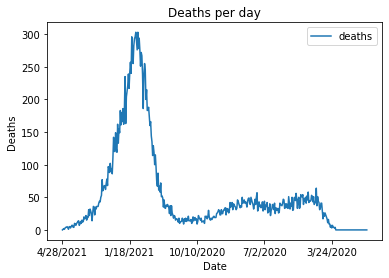

In [20]:
cases_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line")
plt.title("Deaths per day")
plt.xlabel("Date")
plt.ylabel("Deaths")

Text(0, 0.5, 'vaccinated')

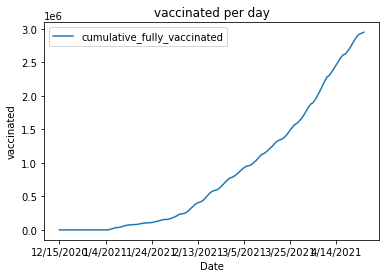

In [110]:
vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 'cumulative_fully_vaccinated',kind="line")
plt.title("vaccine per day")
plt.xlabel("Date")
plt.ylabel("vaccine")

In [7]:
covid_csv = "covid_19_data.csv"

# Import covid data by country, including US data 
covid_df = pd.read_csv(covid_csv, encoding="utf-8")
covid_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504.0,1132.0,65049.0
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480.0,178.0,0.0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321.0,1.0,1314.0
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582.0,834.0,44309.0


In [8]:
us_covid_csv = "covid_19_US.csv"

# Import covid data by country, including US data 
us_covid_df = pd.read_csv(us_covid_csv, encoding="utf-8")
us_covid_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6071,6079,6092,6117,6121,6143,6172,6203,6228,6248
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,19324,19361,19392,19433,19461,19554,19635,19670,19698,19714
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2057,2061,2067,2070,2074,2084,2095,2099,2106,2113
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2405,2411,2414,2416,2417,2432,2437,2442,2445,2449
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6008,6021,6040,6042,6043,6058,6072,6086,6084,6095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,3307,3318,3318,3326,3331,3333,3336,3342,3348,3348
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2021,2024,2024,2027,2030,2036,2037,2048,2054,2054
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,875,877,877,877,879,880,880,880,881,881


In [9]:
#California counties vaccination rates by day with demographic
ca_covid_csv = "covid19vaccinesbycountybydemographic.csv"
ca_covid_df = pd.read_csv(ca_covid_csv, encoding="utf-8")
ca_covid_df

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/26/2021,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/25/2021,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/24/2021,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/23/2021,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/22/2021,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133394,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/19/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133395,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/18/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133396,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/17/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133397,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/16/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False


In [10]:
#sort by administered date
ca_covid_df.sort_values(by = 'administered_date', ascending = False)
ca_covid_df

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/26/2021,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/25/2021,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/24/2021,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/23/2021,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,4/22/2021,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133394,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/19/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133395,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/18/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133396,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/17/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False
133397,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,4,39.0,23.0,12/16/2020,0.0,0.0,0.0,0.0,0.0,0.0,39.0,23.0,False


In [14]:
ca_covid_test = ca_covid_df.groupby(['county']).mean()
ca_covid_test

,est_population,est_age_16plus_pop,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
county,,,,,,,,,,,
Alameda,3.343721e+05,2.701780e+05,1091.777532,25665.690402,780.187970,30294.338788,1203.324635,5.596003e+04,2.742267e+05,2.100327e+05,0.000000
Alpine,2.600000e+02,2.220000e+02,1.527820,45.565414,1.154135,51.320301,1.535338,9.688571e+01,3.596867e+02,3.098534e+02,0.411765
Amador,8.804462e+03,7.607846e+03,21.975674,779.851835,13.175144,540.255639,22.806280,1.320107e+03,7.161189e+03,5.964574e+03,0.000000
Butte,4.856850e+04,3.958450e+04,96.191066,2585.203892,79.511720,3592.714728,102.490933,6.177919e+03,4.132729e+04,3.234329e+04,0.000000
Calaveras,8.877867e+03,7.643267e+03,22.117205,624.301636,15.246793,659.306502,22.899602,1.283608e+03,7.594387e+03,6.359787e+03,0.000000
Colusa,5.166692e+03,3.904538e+03,9.574718,265.067669,6.778195,244.145677,10.375940,5.092133e+02,4.978123e+03,3.611789e+03,0.058824
Contra Costa,2.302737e+05,1.863467e+05,790.182220,19344.586908,579.918620,22529.677134,836.911986,4.187426e+04,1.851425e+05,1.412168e+05,0.000000
Del Norte,6.241000e+03,5.023077e+03,10.554041,280.486842,7.968985,314.116541,11.320959,5.946034e+02,6.001503e+03,4.682086e+03,0.058824
El Dorado,4.047693e+04,3.406336e+04,95.053958,2565.314020,71.942061,3025.416188,100.684211,5.590730e+03,3.399375e+04,2.758057e+04,0.000000


In [12]:
#California counties, with a breakdown of vaccine type and totals by day
ca_county_csv = "covid19vaccinesbycounty.csv"
ca_county_df = pd.read_csv(ca_county_csv, encoding='utf-8')
ca_county_df

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,All CA Counties,12/15/2020,1131,1131,1131,1131,0,0,0,0,1131,1131,0,0,1131,1131,NaN
1,All CA Counties,12/16/2020,8111,9242,8111,9242,0,0,0,0,8111,9242,0,0,8111,9242,NaN
2,All CA Counties,12/17/2020,25702,34944,25702,34944,0,0,0,0,25704,34946,0,0,25704,34946,NaN
3,All CA Counties,12/18/2020,43715,78659,43660,78604,55,55,0,0,43716,78662,0,0,43716,78662,NaN
4,All CA Counties,12/19/2020,25185,103844,25162,103766,23,78,0,0,25184,103845,1,1,25184,103846,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7941,Yuba,4/22/2021,294,30816,104,9288,190,19348,0,2180,157,5929,137,13508,157,19437,California
7942,Yuba,4/23/2021,304,31120,96,9384,208,19556,0,2180,151,5927,153,13661,151,19588,California
7943,Yuba,4/24/2021,167,31287,38,9422,129,19685,0,2180,89,5938,78,13739,89,19677,California
7944,Yuba,4/25/2021,58,31345,20,9442,38,19723,0,2180,31,5942,27,13766,31,19708,California


In [13]:
#remove extra counties that are not part of CA or are unknown

ca_county_df = ca_county_df[ca_county_df.county != 'All CA Counties']
ca_county_df = ca_county_df[ca_county_df.county != 'All CA and Non-CA Counties']
ca_county_df = ca_county_df[ca_county_df.county != 'Outside California']
clean_ca_county_df = ca_county_df[ca_county_df.county != 'Unknown']

clean_ca_county_df

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
522,Alameda,12/15/2020,36,36,36,36,0,0,0,0,36,36,0,0,36,36,California
523,Alameda,12/16/2020,202,238,202,238,0,0,0,0,202,238,0,0,202,238,California
524,Alameda,12/17/2020,396,634,396,634,0,0,0,0,396,634,0,0,396,634,California
525,Alameda,12/18/2020,1766,2400,1765,2399,1,1,0,0,1766,2400,0,0,1766,2400,California
526,Alameda,12/19/2020,1357,3757,1357,3756,0,1,0,0,1357,3757,0,0,1357,3757,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7941,Yuba,4/22/2021,294,30816,104,9288,190,19348,0,2180,157,5929,137,13508,157,19437,California
7942,Yuba,4/23/2021,304,31120,96,9384,208,19556,0,2180,151,5927,153,13661,151,19588,California
7943,Yuba,4/24/2021,167,31287,38,9422,129,19685,0,2180,89,5938,78,13739,89,19677,California
7944,Yuba,4/25/2021,58,31345,20,9442,38,19723,0,2180,31,5942,27,13766,31,19708,California


In [ ]:
Capomulin_plot = Capomulin_mouse.plot('administered_date', 'Tumor Volume (mm3)',kind="line")
plt.title("Capomulin Treatment For Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")